In [2]:
import numpy as np
from scipy.optimize import approx_fprime

In [8]:
import matplotlib.pyplot as plt
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,7

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

a) y = sin(x) , D(x) = (-∞;+∞) <br>
b) y = cos(x) + 2/x, D(x) = [-5;0);(0;5] <br>
c) y = sin(x)**2, D(x) = [1;6] <br>
d) y = 3

In [138]:
from scipy.misc import derivative
derivative(f, 1.0, dx=1e-6)

0.0

In [141]:
def f(x):
    return np.sin(x)
#     return np.cos(x) + 2/x
#     return np.sin(x)**2

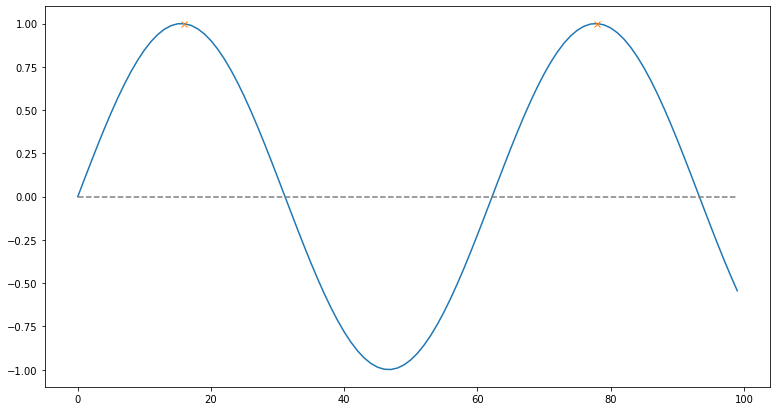

In [143]:
# plot the function
x = np.linspace(0,10,100)
y = f(x)
# pylab.axis([0,60,0,2])
peaks, _ = find_peaks(y, height=0)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 14
         Function evaluations: 28


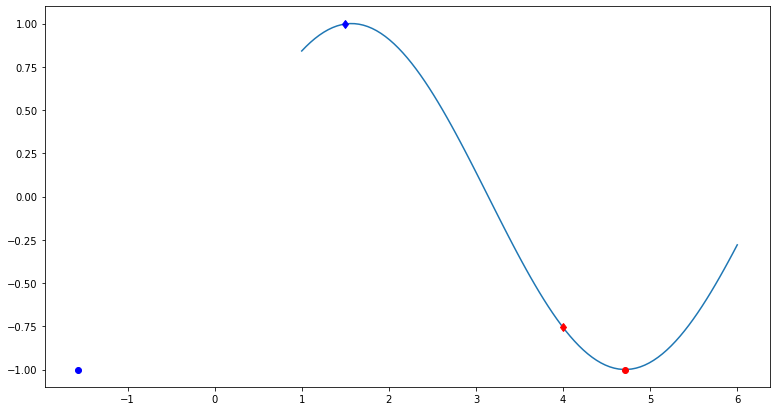

In [144]:
# objective function

x0 = 3/2 # start from x = -5
xmin0 = fmin(f,x0)

x1 = 4 # start from x = -4
xmin1 = fmin(f,x1)

# plot the function
x = np.linspace(1,6,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

# pylab.axis([-10,10,-10,10])
# pylab.axis([0,10,0,2])
pylab.show()

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


der(f(x)) = 2*sin(2x+1)*der(sin(2x+1)) = 2*(sin(2x+1))*cos(2x+1)*2 = 4*sin(2x+1)*cos(2x+1)

In [147]:
def f_(x):
    return 4*np.sin(2*x+1)*np.cos(2*x+1)

In [148]:
def f(x):
    return np.sin(2*x+1)**2

#### check

In [152]:
# производная на бумажке
f_(1)

-0.5588309963978517

In [151]:
# производная втсроенная
derivative(f, 1.0, dx=1e-6)

-0.5588309964152383

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [154]:
def f(x, y):
    return 2*(x**2)*(y**3) + 1/x + (y**2)*x +7

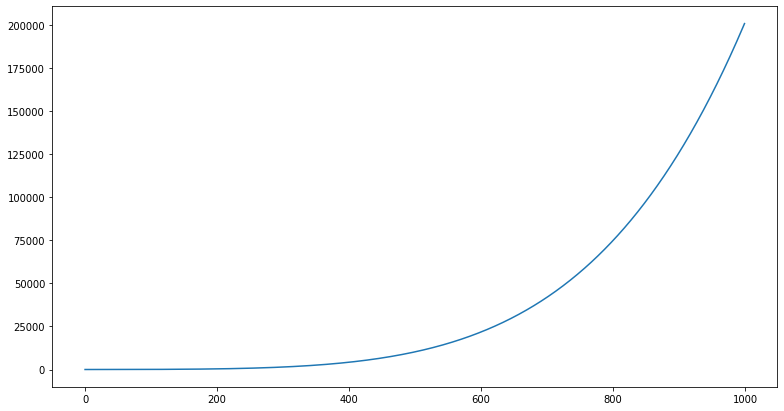

In [157]:
x = np.linspace(1, 10, 1000)
y = np.linspace(1, 10, 1000)
z = f(x,y)
plt.plot(z)

### numpy

In [234]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0*(x[0]**2)*(x[1]**3) + 1/x[0] + (x[1]**2)*x[0] + c1

In [235]:
# x = np.ones(2)
x = np.array([1,2])
# x
c0, c1 = (2, 7)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1)

array([35.00000024, 28.00000024])

### на бумажке

In [167]:
def der_f_x(x,y):
    return 4 * x * y**3 - 1/(x**2) + y**2

In [168]:
def der_f_y(x,y):
    return 6 * (x**2) * y**2 + 2 * y * x

In [170]:
print(f'derivative of f(x,y) for x in M(1,2): {der_f_x(1,2)}')
print(f'derivative of f(x,y) for y in M(1,2): {der_f_y(1,2)}')

derivative of f(x,y) for x in M(1,2): 35.0
derivative of f(x,y) for y in M(1,2): 28


### Задание 4:

Градиентный спуск своими руками

In [236]:
np.set_printoptions(suppress=True)

In [237]:
def f(x):
    return (x[0]**2) + (x[1]**2)

In [238]:
x = np.array([100, 200])
lr = 0.1

In [226]:
x_grad = x
for i in range(1000):
    # Calculate gradient
    eps = np.sqrt(np.finfo(float).eps)
    grad = approx_fprime(x_grad, f, [eps, eps])
    # Update x with gradient
    x_grad = x_grad - grad * lr

In [227]:
print("Минимум достигается в: ", x_grad)
print("Значение функции в минимуме: ", f(x_grad))

Минимум достигается в:  [-0.00000001 -0.00000001]
Значение функции в минимуме:  1.110223024625156e-16


In [233]:
x

array([100, 200])

Проверка с помощью встроенной функции numpy: 

In [243]:
res_nelder_mead = minimize(f, x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164


In [244]:
res_nelder_mead

 final_simplex: (array([[ 0.        , -0.        ],
       [-0.        , -0.        ],
       [-0.        ,  0.00000001]]), array([0., 0., 0.]))
           fun: 1.4326856592347756e-17
       message: 'Optimization terminated successfully.'
          nfev: 164
           nit: 85
        status: 0
       success: True
             x: array([ 0., -0.])

In [241]:
res_powell = minimize(f, x, method='powell', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 40


In [242]:
res_powell

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 6.54312789279448e-26
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 2
  status: 0
 success: True
       x: array([ 0., -0.])